<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regress√£o Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descri√ß√£o:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exerc√≠cio √© criar um modelo de machine learning, utilizando a t√©cnica de Regress√£o Linear, que fa√ßa previs√µes sobre os pre√ßos de im√≥veis a partir de um conjunto de caracter√≠sticas conhecidas dos im√≥veis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset dispon√≠vel no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que √© fixar o conhecimento adquirido no treinamento de Regress√£o Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos coment√°rios acima de cada c√©lular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Pre√ßos do im√≥veis</li>
    <li><b>area</b> - √Årea do im√≥vel</li>
    <li><b>garagem</b> - N√∫mero de vagas de garagem</li>
    <li><b>banheiros</b> - N√∫mero de banheiros</li>
    <li><b>lareira</b> - N√∫mero de lareiras</li>
    <li><b>marmore</b> - Se o im√≥vel possui acabamento em m√°rmore branco (1) ou n√£o (0)</li>
    <li><b>andares</b> - Se o im√≥vel possui mais de um andar (1) ou n√£o (0)</li>
</ul>

## Leitura dos dados

Dataset est√° na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [3]:
dados = pd.read_csv('./dados/HousePrices_HalfMil.csv', sep=';')

## Visualizar os dados

In [4]:
dados.head()

precos  area  garagem  banheiros  lareira  marmore  andares
0   51875    25        3          4        3        0        1
1   17875    35        1          3        1        0        0
2   47075   195        2          4        2        0        0
3   38575    33        2          2        1        0        1
4   33775    11        2          3        0        0        1

## Verificando o tamanho do dataset

In [5]:
dados.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>An√°lises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estat√≠sticas descritivas

In [6]:
dados.describe().round(2)

precos     area  garagem  banheiros  lareira  marmore  andares
count   1000.00  1000.00  1000.00    1000.00  1000.00  1000.00  1000.00
mean   41985.60   124.33     2.01       3.00     2.03     0.33     0.48
std    12140.39    72.39     0.81       1.43     1.42     0.47     0.50
min    13150.00     1.00     1.00       1.00     0.00     0.00     0.00
25%    33112.50    60.75     1.00       2.00     1.00     0.00     0.00
50%    41725.00   123.00     2.00       3.00     2.00     0.00     0.00
75%    51175.00   187.00     3.00       4.00     3.00     1.00     1.00
max    73675.00   249.00     3.00       5.00     4.00     1.00     1.00

## Matriz de correla√ß√£o

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correla√ß√£o</b> √© uma medida de associa√ß√£o linear entre duas vari√°veis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associa√ß√£o negativa perfeita e <b>+1</b> indica associa√ß√£o positiva perfeita.</p>

### Observe as correla√ß√µes entre as vari√°veis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais s√£o mais correlacionadas com a vari√°vel dependete (Pre√ßo)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correla√ß√£o forte entre as vari√°veis explicativas?</li>
</ul>

In [7]:
dados.corr().round(4)

precos    area  garagem  banheiros  lareira  marmore  andares
precos     1.0000  0.1177   0.1028     0.1244   0.1072   0.4308   0.6315
area       0.1177  1.0000  -0.0075    -0.0114   0.0121  -0.0153  -0.0180
garagem    0.1028 -0.0075   1.0000     0.0671   0.0605  -0.0156  -0.0206
banheiros  0.1244 -0.0114   0.0671     1.0000   0.0484  -0.0253  -0.0182
lareira    0.1072  0.0121   0.0605     0.0484   1.0000   0.0296  -0.0035
marmore    0.4308 -0.0153  -0.0156    -0.0253   0.0296   1.0000  -0.0065
andares    0.6315 -0.0180  -0.0206    -0.0182  -0.0035  -0.0065   1.0000

- Quais s√£o mais correlacionadas com a vari√°vel dependete (Pre√ßo)?
    - Banheiro
    - Marmore
    - Andares
- Qual o relacionamento entre elas (positivo ou negativo)?
    - O relacionamento √© possitivo
- Existe correla√ß√£o forte entre as vari√°veis explicativas?
    - N√£o

# <font color='red' style='font-size: 30px;'>Comportamento da Vari√°vel Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# An√°lises gr√°ficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [8]:
import seaborn as sns

## Configure o estilo e cor dos gr√°ficos (opcional)

In [9]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

## Box plot da vari√°vel *dependente* (y)


### Avalie o comportamento da distribui√ß√£o da vari√°vel dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tend√™ncia?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

Text(0.5, 0, 'Valor')

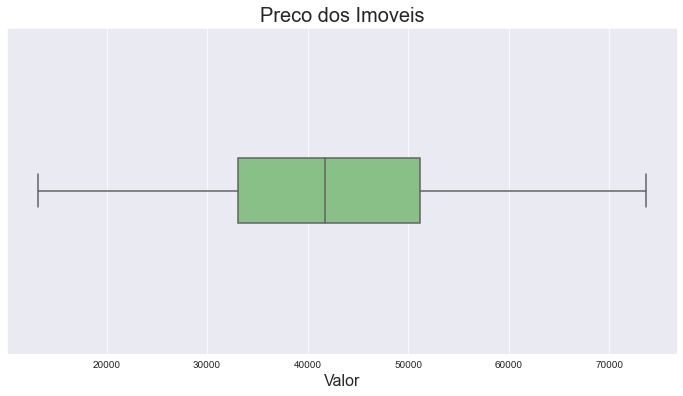

In [10]:
ax = sns.boxplot(x='precos', data=dados, width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Preco dos Imoveis', fontsize=20)
ax.set_xlabel('Valor', fontsize=16)

- Parecem existir valores discrepantes (outliers)?
  - N√£o consegui identificar nenhum outlier at√© o momento
- O box plot apresenta alguma tend√™ncia?
  - O plot tem uma leve inclina√ß√£o a esquerda

## Investigando a vari√°vel *dependente* (y) juntamente com outras caracter√≠stica

Fa√ßa um box plot da vari√°vel dependente em conjunto com cada vari√°vel explicativa (somente as categ√≥ricas).

### Avalie o comportamento da distribui√ß√£o da vari√°vel dependente com cada vari√°vel explicativa categ√≥rica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estat√≠sticas apresentam mudan√ßa significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tend√™ncia bem definida?</li>
</ul>

### Box-plot (Pre√ßo X Garagem)

Text(0, 0.5, 'Valor')

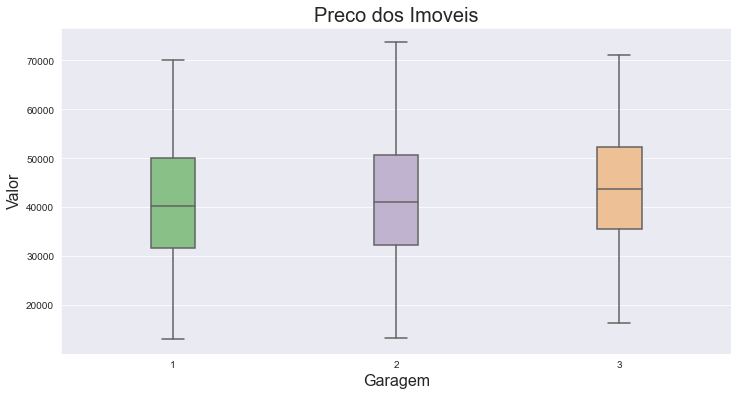

In [11]:
ax = sns.boxplot(x='garagem', y='precos', data=dados, width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Preco dos Imoveis', fontsize=20)
ax.set_xlabel('Garagem', fontsize=16)
ax.set_ylabel('Valor', fontsize=16)

### Box-plot (Pre√ßo X Banheiros)

Text(0, 0.5, 'Valor')

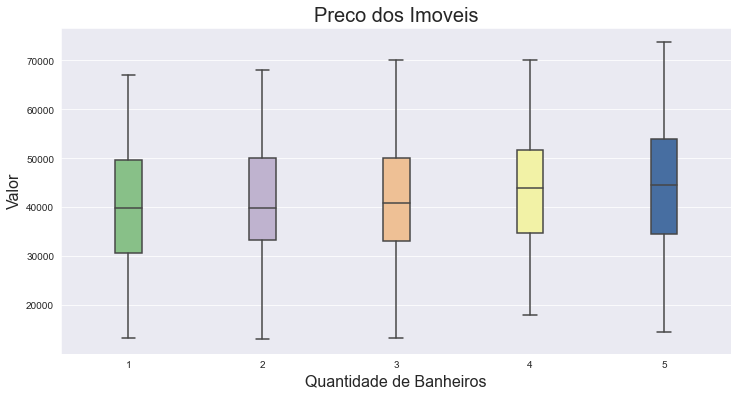

In [12]:
ax = sns.boxplot(x='banheiros', y='precos', data=dados, width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Preco dos Imoveis', fontsize=20)
ax.set_xlabel('Quantidade de Banheiros', fontsize=16)
ax.set_ylabel('Valor', fontsize=16)

### Box-plot (Pre√ßo X Lareira)

Text(0, 0.5, 'Valor')

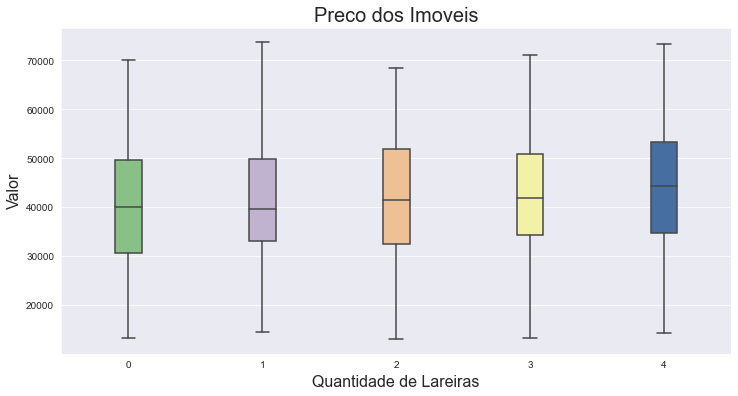

In [13]:
ax = sns.boxplot(x='lareira', y='precos', data=dados, width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Preco dos Imoveis', fontsize=20)
ax.set_xlabel('Quantidade de Lareiras', fontsize=16)
ax.set_ylabel('Valor', fontsize=16)

### Box-plot (Pre√ßo X Acabamento em M√°rmore)

Text(0, 0.5, 'Valor')

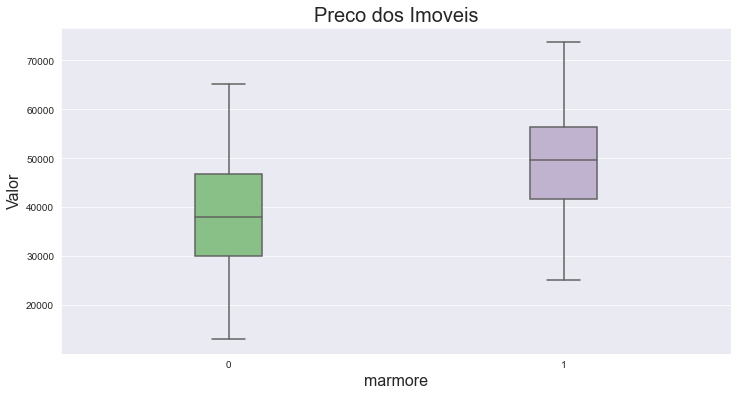

In [14]:
ax = sns.boxplot(x='marmore', y='precos', data=dados, width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Preco dos Imoveis', fontsize=20)
ax.set_xlabel('marmore', fontsize=16)
ax.set_ylabel('Valor', fontsize=16)

### Box-plot (Pre√ßo X Andares)

Text(0, 0.5, 'Valor')

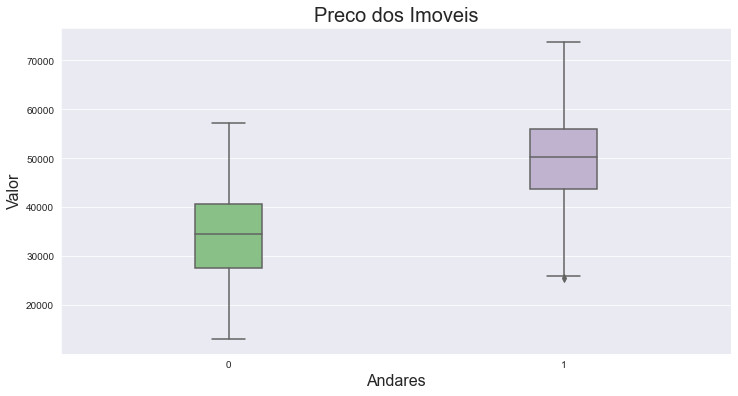

In [15]:
ax = sns.boxplot(x='andares', y='precos', data=dados, width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Preco dos Imoveis', fontsize=20)
ax.set_xlabel('Andares', fontsize=16)
ax.set_ylabel('Valor', fontsize=16)

## Distribui√ß√£o de frequ√™ncias da vari√°vel *dependente* (y)

Construa um histograma da vari√°vel dependente (Pre√ßo).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribui√ß√£o de frequ√™ncias da vari√°vel dependente parece ser assim√©trica?</li>
    <li>√â poss√≠vel supor que a vari√°vel dependente segue uma distribui√ß√£o normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<AxesSubplot:xlabel='precos', ylabel='Count'>

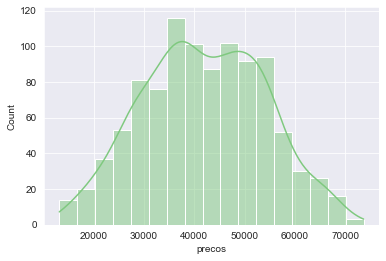

In [16]:
sns.histplot(dados['precos'], kde=True)

 - A distribui√ß√£o de frequ√™ncias da vari√°vel dependente parece ser assim√©trica?
     - N√£o
 - √â poss√≠vel supor que a vari√°vel dependente segue uma distribui√ß√£o normal?
     - Pela visualiza√ß√£o em histograma vemos que e poss√≠vel sim

## Gr√°ficos de dispers√£o entre as vari√°veis do dataset

## Plotando o pairplot fixando somente uma vari√°vel no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gr√°ficos de dispers√£o da vari√°vel dependente contra cada vari√°vel explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gr√°fico utilizando o par√¢metro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>√â poss√≠vel identificar alguma rela√ß√£o linear entre as vari√°veis?</li>
    <li>A rela√ß√£o √© positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correla√ß√£o.</li>
</ul>

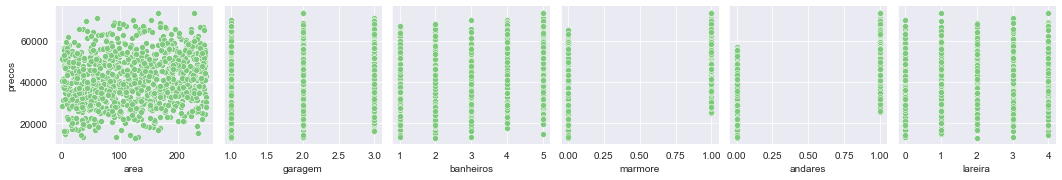

In [34]:
sns.pairplot(dados,
             x_vars=['area','garagem', 'banheiros', 'marmore', 'andares', 'lareira'],
             y_vars=['precos'])

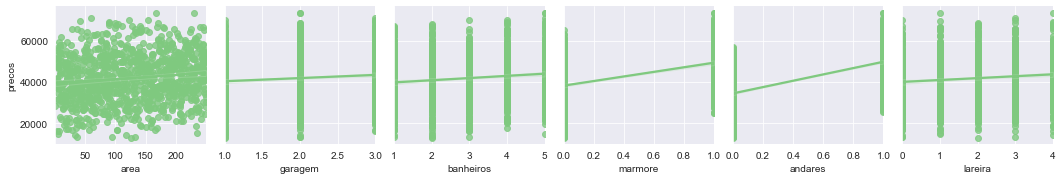

In [35]:
sns.pairplot(dados,
             x_vars=['area','garagem', 'banheiros', 'marmore', 'andares', 'lareira'],
             y_vars=['precos'],
             kind='reg')

 - √â poss√≠vel identificar alguma rela√ß√£o linear entre as vari√°veis?
     - Sim, principalmente quando comparamos com as vari√°veis marmore e andares
 - A rela√ß√£o √© positiva ou negativa?
     - Positiva com todas as vari√°veis

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regress√£o Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [19]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a vari√°vel dependente (y)

In [20]:
y = dados['precos']
y

0      51875
1      17875
2      47075
3      38575
4      33775
       ...  
995    29150
996    43550
997    56575
998    56075
999    13350
Name: precos, Length: 1000, dtype: int64

## Criando um DataFrame (pandas) para armazenar as vari√°veis explicativas (X)

In [36]:
X = dados[['area','garagem', 'banheiros',  'lareira', 'marmore', 'andares']]
X

area  garagem  banheiros  lareira  marmore  andares
0      25        3          4        3        0        1
1      35        1          3        1        0        0
2     195        2          4        2        0        0
3      33        2          2        1        0        1
4      11        2          3        0        0        1
..    ...      ...        ...      ...      ...      ...
995    48        1          5        4        0        0
996   112        2          2        3        0        1
997   185        3          4        4        0        1
998   185        2          3        1        0        1
999    94        1          1        3        0        0

[1000 rows x 6 columns]

## Criando os datasets de treino e de teste

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2811)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [39]:
modelo = LinearRegression()

## Utilizando o m√©todo *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [40]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determina√ß√£o (R¬≤) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Voc√™ lembra o que representa o R¬≤?</li>
    <li>Qual medida podemos tomar para melhorar essa estat√≠stica?</li>
</ul>

In [41]:
print('R¬≤ = {} '.format(modelo.score(X_train, y_train).round(2)))

R¬≤ = 0.64 


 - O modelo apresenta um bom ajuste?
     - Esta com um ajuste acima de 60% relativamente bom
 - Voc√™ lembra o que representa o R¬≤?
     - A rela√ß√£o de acertividade do modelo "quando maior melhor"
 - Qual medida podemos tomar para melhorar essa estat√≠stica?
     - Testar com mais variaveis explicativas

## Gerando previs√µes para os dados de TESTE (X_test) utilizando o m√©todo *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [42]:
y_predict = modelo.predict(X_test)

## Obtendo o coeficiente de determina√ß√£o (R¬≤) para as previs√µes do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [43]:
print('R¬≤ previsto = {}'.format(metrics.r2_score(y_test, y_predict).round(2)))

R¬≤ previsto = 0.67


# <font color='red' style='font-size: 30px;'>Obtendo Previs√µes Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de pre√ßo a partir de um conjunto de informa√ß√µes de um im√≥vel.

In [46]:
dados[0:1]

precos  area  garagem  banheiros  lareira  marmore  andares
0   51875    25        3          4        3        0        1

In [48]:
area=25
garagem=3
banheiros=4
lareira=3
marmore=0
andares=1

entrada = [[area,garagem,banheiros,lareira,marmore,andares]]

preco = modelo.predict(entrada)[0]
print('O pre√ßo previsto para o imovel √©: R$ {0:.2f}'.format(preco))

O pre√ßo previsto para o imovel √©: R$ 47215.03


# <font color='red' style='font-size: 30px;'>M√©tricas de Regress√£o</font>
<hr style='border: 2px solid red;'>

## M√©tricas da regress√£o
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estat√≠sticas obtidas do modelo de regress√£o s√£o muito √∫teis como crit√©rio de compara√ß√£o entre modelos estimados e de sele√ß√£o do melhor modelo, as principais m√©tricas de regress√£o que o scikit-learn disponibiliza para modelos lineares s√£o as seguintes:

### Erro Quadr√°tico M√©dio

M√©dia dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Ra√≠z do Erro Quadr√°tico M√©dio

Ra√≠z quadrada da m√©dia dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determina√ß√£o - R¬≤

O coeficiente de determina√ß√£o (R¬≤) √© uma medida resumida que diz quanto a linha de regress√£o ajusta-se aos dados. √â um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo m√©tricas para o modelo com Temperatura M√°xima

In [49]:
ùê∏ùëÑùëÄ = metrics.mean_squared_error(y_test, y_predict).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_predict)).round(2)
R_2 = metrics.r2_score(y_test, y_predict).round(2)

medidas = pd.DataFrame([EQM, REQM, R_2], ['EQM', 'REQM', 'R¬≤'], columns=['Metrics'])
medidas

Metrics
EQM   50197019.50
REQM      7084.99
R¬≤           0.67

# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [50]:
import pickle

## Salvando o modelo estimado

In [51]:
output = open('modelo_exercicio', 'wb')
pickle.dump(modelo,output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_exercicio','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```